In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, svm
import math
import seaborn as sn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [26]:
dataSet = pd.read_csv("Tetuan City power consumption.csv")
dataSet.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [27]:
# check for a null cell in the dataFrame
print(' # any null cell ? :=> ', dataSet.isnull().values.any() )
print('\n # columns : ',dataSet.columns)
print('\n # Get data description : ')
dataSet.info()

 # any null cell ? :=>  False

 # columns :  Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

 # Get data description : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52

In [28]:
dataSet.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [29]:
# i'll use only "Zone 1 Power Consumption" dependant variable 
data = dataSet.drop(dataSet.columns[[-1, -2]], axis=1)
# drop DateTime Column
data = data.drop(columns= ['DateTime'], axis=1)

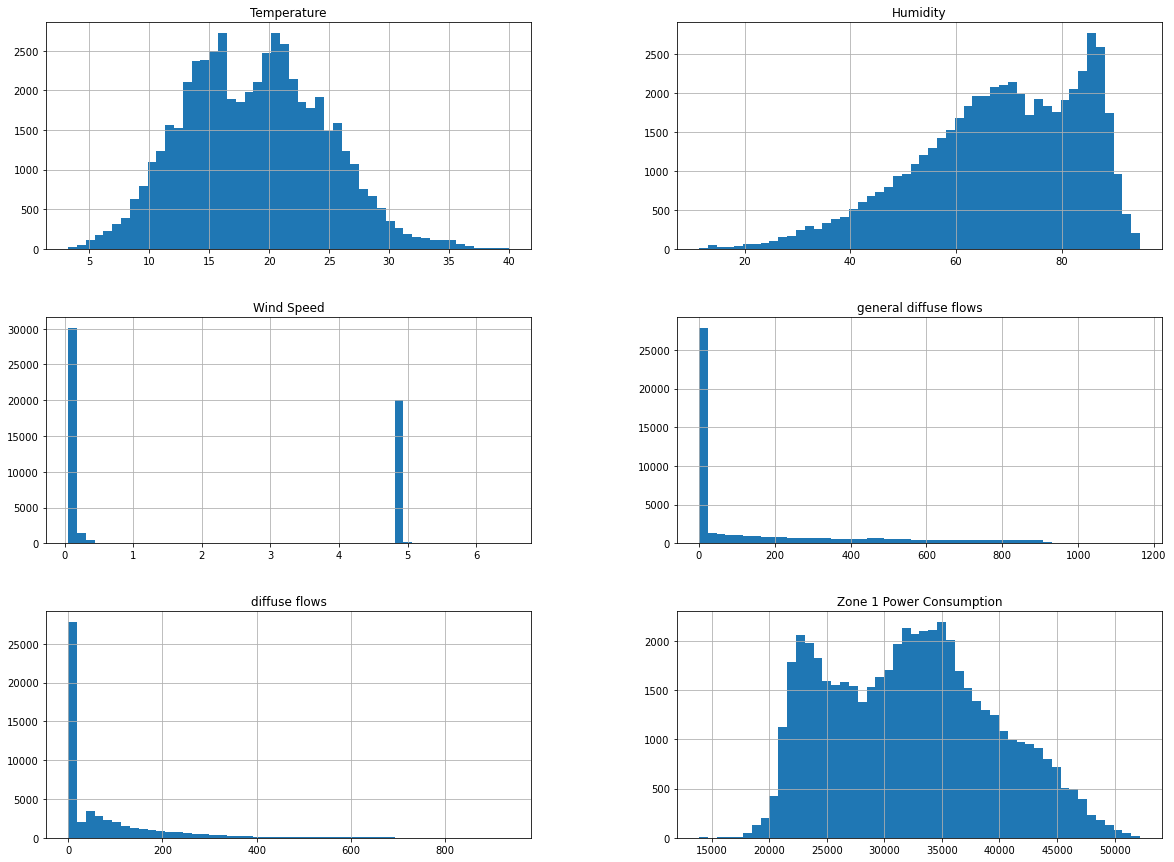

In [30]:
# ploting a histogram for each numerical attribute help sometimes to get more insights on the data
data.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
# 80% trainning & 20% testing 

trainning_set = data.sample(frac=0.8, random_state=25) 
test_set = data.drop(trainning_set.index)

# better way : requires refactoring 
"""
x = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y = data[['Zone 1 Power Consumption']]
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.2, random_state = True)
""" 


"\nx = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]\ny = data[['Zone 1 Power Consumption']]\nX_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.2, random_state = True)\n"

In [32]:
print("# trainning_set.shape :", trainning_set.shape)
trainning_set

# trainning_set.shape : (41933, 6)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
17502,28.80,30.66,0.072,877.000,145.100,35378.36066
47515,13.39,78.60,0.078,0.044,0.100,30418.46154
33120,24.01,72.40,0.062,0.088,0.107,38140.02220
35396,22.55,55.79,0.164,21.020,17.400,40377.34513
5573,12.11,65.68,4.919,93.600,94.300,31454.23729
...,...,...,...,...,...,...
51835,15.44,51.64,0.080,0.051,0.167,30418.25095
11381,11.61,82.20,0.078,0.059,0.108,26275.40426
41078,19.00,61.19,0.086,0.048,0.096,27003.93873
47171,17.31,40.14,4.920,486.600,31.900,29729.23077


In [33]:
print("# test_set.shape :", test_set.shape)
test_set

# test_set.shape : (10483, 6)


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
20,5.041,77.20,0.081,0.062,0.152,20870.88608
22,4.896,76.60,0.085,0.070,0.137,20597.46835
28,5.156,74.00,0.079,0.062,0.148,20494.17722
32,5.546,74.00,0.082,0.055,0.093,20627.84810
49,4.807,73.10,0.082,0.955,0.949,18987.34177
...,...,...,...,...,...,...
52397,9.290,64.25,0.085,0.070,0.085,36623.57414
52402,7.650,71.10,0.082,0.084,0.093,34591.63498
52405,7.640,70.10,0.083,0.055,0.119,34737.64259
52410,7.070,72.50,0.080,0.059,0.093,32158.17490


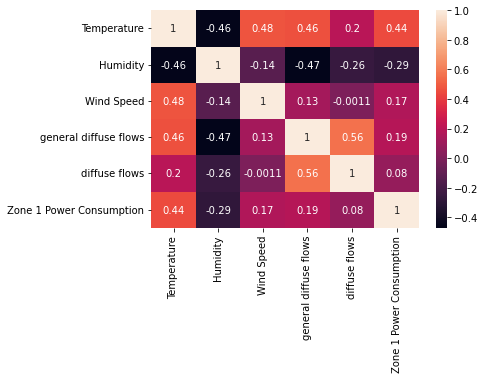

In [34]:
tr_corr_mat = trainning_set.corr()
sn.heatmap(tr_corr_mat, annot=True)
plt.show() 

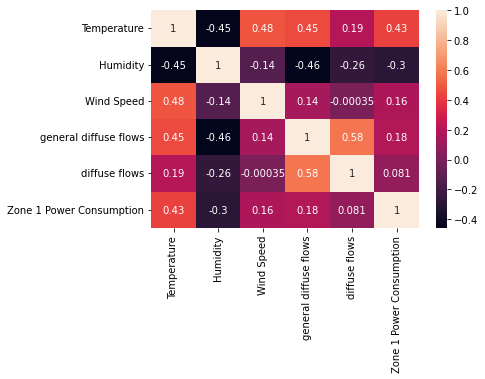

In [35]:
ts_corr_mat = test_set.corr()
sn.heatmap(ts_corr_mat, annot=True)
plt.show()

In [76]:
linearReg_model = linear_model.LinearRegression()
linearReg_model.fit( trainning_set[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows']],
          trainning_set['Zone 1 Power Consumption'] )

print("# coeffs : ", linearReg_model.coef_)
print("# intercept : ", linearReg_model.intercept_)

X_test = test_set[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows']]
Y_test =  test_set['Zone 1 Power Consumption']
Y_pred = linearReg_model.predict(X_test)
    
linearReg_score = round(linearReg_model.score(X_test, Y_test), 2)
linearReg_mae = round(metrics.mean_absolute_error(Y_test, Y_pred), 4)
linearReg_mse = round(metrics.mean_squared_error(Y_test, Y_pred), 4)


# coeffs :  [ 5.41202879e+02 -5.39363138e+01 -1.52207122e+02 -1.67506742e+00
 -1.66503569e-01]
# intercept :  26458.22166118787


In [71]:
test_values = test_set.iloc[1:3,:]
test_values

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
22,4.896,76.6,0.085,0.070,0.137,20597.46835
28,5.156,74.0,0.079,0.062,0.148,20494.17722


In [72]:
 test_values.iloc[:, :5]

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
22,4.896,76.6,0.085,0.070,0.137
28,5.156,74.0,0.079,0.062,0.148


In [73]:
print(
    linearReg_model.predict([ test_values.iloc[ 0,:5] ]), # needs to be as close as possible to the real value : 20597.46835
    linearReg_model.predict([ test_values.iloc[ 1,:5] ]) # needs to be as close as possible to the real value : 20494.17722
)

[24963.35165088] [25245.22362709]


In [87]:
svm_model = svm.SVR()
svm_model.fit( trainning_set[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows']],
          trainning_set['Zone 1 Power Consumption'] )


X_test = test_set[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows']]
Y_test =  test_set['Zone 1 Power Consumption']
Y_pred = linearReg_model.predict(X_test)
    
svm_model_score = round(linearReg_model.score(X_test, Y_test), 2)
svm_model_mae = round(metrics.mean_absolute_error(Y_test, Y_pred), 4)
svm_model_mse = round(metrics.mean_squared_error(Y_test, Y_pred), 4)


In [95]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)

X_test = test_set[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows']]
x_poly= poly_regs.fit_transform(X_test)

x_poly


array([[1.0000e+00, 5.0410e+00, 7.7200e+01, ..., 3.8440e-03, 9.4240e-03,
        2.3104e-02],
       [1.0000e+00, 4.8960e+00, 7.6600e+01, ..., 4.9000e-03, 9.5900e-03,
        1.8769e-02],
       [1.0000e+00, 5.1560e+00, 7.4000e+01, ..., 3.8440e-03, 9.1760e-03,
        2.1904e-02],
       ...,
       [1.0000e+00, 7.6400e+00, 7.0100e+01, ..., 3.0250e-03, 6.5450e-03,
        1.4161e-02],
       [1.0000e+00, 7.0700e+00, 7.2500e+01, ..., 3.4810e-03, 5.4870e-03,
        8.6490e-03],
       [1.0000e+00, 6.7580e+00, 7.3000e+01, ..., 4.3560e-03, 5.8740e-03,
        7.9210e-03]])

In [89]:
pd.DataFrame(
    {  'Model' : ['Linear Regression', "SVM regression" ],
       'Score' : [linearReg_score, svm_model_score ],
        'MAE'  : [linearReg_mae, svm_model_mae ],
        'MSE'  : [linearReg_mse, svm_model_mse ]
    })

,Model,Score,MAE,MSE
0,Linear Regression,0.2,5210.8457,4.024548e+07
1,SVM regression,0.2,5210.8457,4.024548e+07
